In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 2000)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms
plt.style.use('fivethirtyeight')

In [2]:
# Import relevant dataframes:

main_table = pd.read_csv(r"C:\Users\Public\_Data\_Data\Latest_Version\Main_Data\Main_Table_10182019.csv")
print(len(main_table))
faculty_table = pd.read_csv(r"C:\Users\Public\_Data\_Data\Latest_Version\Faculty_Data\Faculty_Table_08272019.csv")
print(len(faculty_table))
skill_table = pd.read_csv(r"C:\Users\Public\_Data\_Data\Latest_Version\Skills_Data\Skill_Table_06072019.csv")
print(len(skill_table))

3957167
3957167
36101672


In [3]:
def title_swap(string):
    dictionary = {'Community and Social Services':'Counseling and Religious Life',
                  'Customer and Client Support':'Online Support and University Information',
                  'Hospitality, Food, and Tourism':'Event Management and Hospitality', 
                  'Planning and Analysis':'Analysis', 
                  'Curriculum and Instructional Designer / Developer':'Curriculum and Instructional Designer', 
                  'Special Education Teacher':'Accessibility and Disability Services', 
                  'Teaching Assistant':'Faculty Support', 
                  'Tutor':'Academic Tutor',
                  'Clerical and Administrative':'Administrative',
                  'na' : 'Uncategorized'}
    if(string in dictionary):
        return dictionary[string]
    else:
        return string

In [4]:
mask = skill_table[(skill_table['Skill Name']=='Social Work')|
                   (skill_table['Skill Name']=='Social Services')|
                   (skill_table['Skill Name']=='Policy Analysis')|
                   (skill_table['Skill Name']=='Policy Reserach')|
                   (skill_table['Skill Name']=='Social Studies')|
                   (skill_table['Skill Name']=='Policy Evaluation')|
                   (skill_table['Skill Name']=='Policy Development')
                   &
                   (skill_table['Skill Name']=='Research')][['Job ID']]

Communication Skills
Teamwork / Collaboration
Schedulling
Project Management
Supervisory Skills
Budgeting
Planning
Grant Writing
Data Management
Quantatative Analysis

# to add another filter: | (skill_table['Skill Name']=='')
mask = mask.drop_duplicates('Job ID')
# print(len(mask))

table = main_table.merge(mask, on='Job ID', how='inner')
print('Number of total Jobs:\n\t' + str(len(table)))

table['Career Area'] = table['Career Area'].apply(title_swap)
table['Occupation'] = table['Occupation'].apply(title_swap)

table = table[(table['Minimum EDU Requirements']>=18)]

print('Number of Jobs with MA or Above:\n\t' + str(len(table)))

# print('Number of total Jobs:\n\t', len(table))

mask = faculty_table[(faculty_table['Faculty']==0)&(faculty_table['Post-Doctoral']==0)]['Job ID']
table = table.merge(mask, on='Job ID', how='inner')
print('Number of non-faculty Jobs:\n\t' + str(len(table)))

# minimum_size = 10
# mask = pd.DataFrame(table['Occupation'].value_counts()).reset_index().rename(columns={'Occupation':'count', 'index':'Occupation'})
# mask = mask[mask['count']>=minimum_size][['Occupation']]
# table = table.merge(mask, on='Occupation', how='inner')
# print('Size of table after removing categories smaller than ' + str(minimum_size) + ' postings:\n\t' +
#       str(len(table)))

# Social Services and Social Work Only:
# Number of total Jobs:
# 	81817
# Number of Jobs with MA or Above:
# 	25126
# Number of non-faculty Jobs:
# 	17701

# Adding Policy Analysis, Policy Reserach, Social Studies, Policy Evaluation, and Policy Development
# Number of total Jobs:
# 	81817
# Number of Jobs with MA or Above:
# 	25126
# Number of non-faculty Jobs:
# 	18674


Number of total Jobs:
	81817
Number of Jobs with MA or Above:
	25126
Number of non-faculty Jobs:
	18674


In [5]:
pd.DataFrame(table[['Job ID']].merge(skill_table, on='Job ID', how='inner')['Skill Name'].value_counts())

,Skill Name
Communication Skills,9489
Policy Development,8567
Research,7147
Teamwork / Collaboration,6793
Social Work,6047
Planning,5724
Budgeting,5044
Teaching,4149
Social Services,3871
Writing,3811


In [17]:
# Categorical Breakdowns
def occupational_breakdowns(df, category, year1, year2):

    if(year1 >= year2):
        if(year1>year2):
            temp = year1
            year1 = year2
            year2 = temp
        else:
            raise ValueError('Years cannot be the same.')

    df = df[(df['Year']==year1)|(df['Year']==year2)]

    print('Growth of Non-Faculty Social Policy Jobs from', year1, 'to', year2)
    print()

    skill_2nd = ''

    if (skill_2nd != ''):
        mask = skill_table[skill_table['Skill Name']==skill_2nd][['Job ID']]
        df = df.merge(mask, on='Job ID', how='inner')

    def get_categorical_sizes(df, category):
        df_size = len(df)
        cat = pd.DataFrame(df[category].value_counts()).reset_index().rename(
            columns={category:'count', 'index':category})
        cat['incidence'] = np.true_divide(cat['count'], df_size)
        return cat

    cat_1 = get_categorical_sizes(df[df['Year']==year1], category)

    cat_2 = get_categorical_sizes(df[df['Year']==year2], category)

    def graph_categories(df, category, title, top=10):
        df = df[:top]

        rates = df['incidence'].values
        names = df[category].values

        ind = np.array([x for x, _ in enumerate(names)])

        plt.bar(ind, rates, label='Incidence Rate')

        plt.xticks(ind, names, rotation = 'vertical')
        plt.xlabel(category + 's')
        plt.ylabel('Incidence of\n' + category + 's in Social Policy')
        plt.legend(loc='upper right')
        plt.title(title)

        plt.show()

    graph_categories(cat_1, category, title='Top ' + category + 's in ' + str(year1))

    graph_categories(cat_2, category, title='Top ' + category + 's in ' + str(year2))

    cat = cat_1.merge(cat_2, on=category, how='inner')
    cat = cat[cat['count_y']>=30]
    cat['growth'] = round(np.true_divide(cat['incidence_y']-cat['incidence_x'], cat['incidence_x'])*100, 2)
    cat = cat.sort_values(by='growth', ascending=False)
    cat = cat.reset_index(drop=True)
    cat = cat.rename(columns={'count_x':'count_'+str(year1), 'incidence_x':'incidence_'+str(year1),
                              'count_y':'count_'+str(year2), 'incidence_y':'incidence_'+str(year2)})
    display(cat)


In [11]:
display(table[table['Year']==2017][['Career Area', 'Occupation', 'Job ID']].groupby([
    'Career Area', 'Occupation']).count())




Job ID
Career Area                                Occupation                                               
Administrative                             Administrative Manager                                 44
                                           Business Office Manager                                 2
                                           Collections Manager                                     1
                                           Executive Assistant                                     9
                                           Front Office Assistant                                  1
                                           Healthcare Office Manager                               2
                                           Office / Administrative Assistant                      17
                                           Office Manager (General)                                2
                                           Project / Program Administrative Assistant              1
                                           Senior Office / Administrative Assistant                1
Agriculture, Horticulture, & the Outdoors  Nursery / Greenhouse Manager                            1
Analysis                                   Business / Management Consultant                        6
                                           Business Analyst (General)                             10
                                           Clinical Research Coordinator                           1
                                           Clinical Research Director                              1
                                           Clinical Research Manager                               1
                                           Community Planner                                       3
                                           Data Analyst (General)                                  2
                                           Economist                                               2
                                           Epidemiologist                                          9
                                           GIS Analyst                                             1
                                           Infectious Disease Scientist                            2
                                           Junior Business Analyst                                 8
                                           Medical Research Scientist                             12
                                           Medical Research Specialist                             5
                                           Oncology Research Scientist                             7
                                           Policy Analyst                                         32
                                           Program Analyst                                         1
                                           Security / Defense Intelligence Analyst                 1
                                           Senior Data Analyst                                     1
                                           Statistician                                            7
Business Management and Operations         Buyer (General)                                         1
                                           Chief Executive Officer                                 9
                                           Chief of Staff                                          4
                                           Client Engagement Manager                               2
                                           Director of Operations                                  6
                                           Director of Program Management                          2
                                           Director of Project Management                          1
                                           Education P

In [13]:
# 
occc_break = table[(table['Occupation']=='Administrator, Higher Education')|
      (table['Occupation']=='Librarian')|
      (table['Occupation']=='Research Associate')|
      (table['Occupation']=='Dean of Academic Division')|
      (table['Occupation']=='Director of Student Affairs')|
      (table['Occupation']=='Dean of Academic Affairs')|
      (table['Occupation']=='Program Director, Higher Education')|
      (table['Occupation']=='Administrative Manager')|
      (table['Occupation']=='Dean of Students')|
      (table['Occupation']=='General Manager')|
      (table['Occupation']=='Policy Analyst')|
      (table['Occupation']=='Education Program Manager')|
      (table['Occupation']=='Academic / Guidance Counselor')|
      (table['Occupation']=='Associate Dean, Higher Education')|
      (table['Occupation']=='Social Science Researhcer')|
      (table['Occupation']=='Program Manager (General)')|
      (table['Occupation']=='Research Scienteist')|
      (table['Occupation']=='Curriculum and Instructional Designer')|
      (table['Occupation']=='Admissions Director')|
      (table['Occupation']=='Compliance Manager')|
      (table['Occupation']=='Fundraising Manager')|
      (table['Occupation']=='Human Reseources Specialist')|
      (table['Occupation']=='Student Affairs Administrator')|
      (table['Occupation']=='Grants Manager / Administrator')]

In [26]:
Regressison Analysis
Survey Research
Qualatative Research
Quantitative Research
Quantatiatve Analysis
Qualitative Analysis
Researh Design
Research

mask = skill_table

In [27]:
clust_break['Skill Name'].value_counts()

Qualitative Research      206
Research Design           189
Quantitative Research     148
Research Reports          100
Experiments                96
Qualitative Analysis       62
Basic Research             18
Experimental Design        16
Analytical Testing          4
Scientific Analysis         3
Computational Modeling      1
Name: Skill Name, dtype: int64

In [16]:
pd.DataFrame(temp[['Job ID']].merge(skill_table, on='Job ID', how='inner')['Skill Name'].value_counts())

,Skill Name
Policy Development,2982
Communication Skills,2568
Research,2357
Budgeting,2285
Planning,2023
Teamwork / Collaboration,1816
Teaching,1470
Staff Management,1292
Strategic Planning,1222
Writing,1204


Growth of Non-Faculty Social Policy Jobs from 2010 to 2017



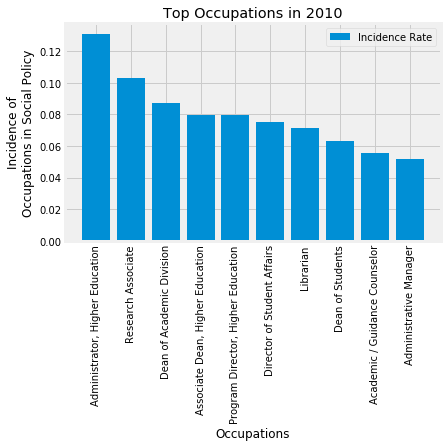

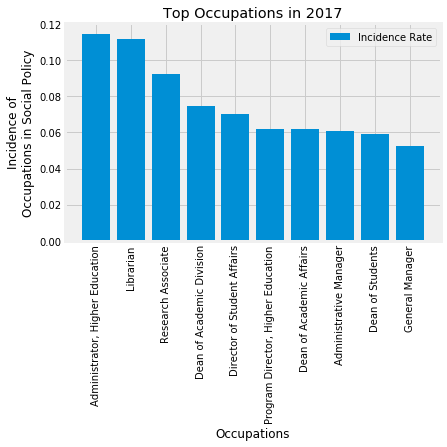

,Occupation,count_2010,incidence_2010,count_2017,incidence_2017,growth
0,Dean of Academic Affairs,4,0.015873,45,0.062069,291.03
1,Policy Analyst,3,0.011905,32,0.044138,270.76
2,Librarian,18,0.071429,81,0.111724,56.41
3,Education Program Manager,8,0.031746,30,0.041379,30.34
4,General Manager,11,0.043651,38,0.052414,20.08
5,Administrative Manager,13,0.051587,44,0.060690,17.64
6,Dean of Students,16,0.063492,43,0.059310,-6.59
7,Director of Student Affairs,19,0.075397,51,0.070345,-6.70
8,Research Associate,26,0.103175,67,0.092414,-10.43
9,"Administrator, Higher Education",33,0.130952,83,0.114483,-12.58


In [19]:
occupational_breakdowns(temp, 'Occupation', 2010, 2017)

In [12]:
table['Year'].value_counts()

2017    3368
2016    3113
2015    2371
2014    2260
2013    2169
2012    1658
2011    1275
2010     948
2007     539
Name: Year, dtype: int64